In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.preprocessing import LabelEncoder
import spacy
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk import  pos_tag, ne_chunk
from nltk.tree import Tree
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')



from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC



from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense , Bidirectional , GRU ,Conv1D, GlobalMaxPooling1D , Dropout , BatchNormalization , SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## DATA SETS

In [ ]:
#train 5 datasets
# test 1 dataset + given sentences

dataset1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/PROMISE_exp.csv")
dataset1.rename(columns={'RequirementText': 'Requirement' , '_class_':'Type'}, inplace=True)
dataset1.drop(columns=['ProjectID'], inplace=True)
dataset1


,Requirement,Type
0,The system shall refresh the display every 60 ...,PE
1,The application shall match the color of the s...,LF
2,If projected the data must be readable. On a...,US
3,The product shall be available during normal b...,A
4,If projected the data must be understandable....,US
...,...,...
964,The system should be portable to various opera...,PO
965,Registered User must be able to maintain his/h...,F
966,The entire website must be user-friendly and e...,US
967,The system shall support up to 10000 simultane...,PE


In [ ]:

dataset2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/nfr-train.csv")
dataset2.rename(columns={'Column2': 'Requirement' , 'Column1':'Type'}, inplace=True)
dataset2 = dataset2.reindex(columns=['Requirement','Type'])

dataset2

,Requirement,Type
0,The system shall refresh the display every 60 ...,PE
1,The application shall match the color of the s...,LF
2,If projected the data must be readable. On ...,US
3,The product shall be available during normal ...,A
4,If projected the data must be understandable...,US
...,...,...
551,The product interface should be fast. The resp...,PE
552,The system will use the stored e-mail addresse...,F
553,The system will notify affected parties for r...,F
554,The system will notify affected parties when ...,F


In [ ]:

dataset3= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/nfr_train_2.csv")
dataset3.rename(columns={'RequirementText': 'Requirement' , 'class':'Type'}, inplace=True)
dataset3.drop(columns=['ProjectID'], inplace=True)
dataset3

,Requirement,Type
0,The system shall refresh the display every 60 ...,PE
1,The application shall match the color of the s...,LF
2,If projected the data must be readable. On ...,US
3,The product shall be available during normal ...,A
4,If projected the data must be understandable...,US
...,...,...
620,User access should be limited to the permissi...,SE
621,The product must comply with the intranet pa...,LF
622,The intranet pages should display appropriate...,LF
623,The users should be able to easily use the s...,US


In [ ]:

dataset4= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/software_requirements_extended.csv")
dataset4.rename(columns={ 'class':'Type'}, inplace=True)
dataset4 = dataset4.reindex(columns=['Requirement','Type'])

dataset4

,Requirement,Type
0,The system shall refresh the display every 60 ...,PE
1,The application shall match the color of the s...,LF
2,If projected the data must be readable. On ...,US
3,The product shall be available during normal ...,A
4,If projected the data must be understandable...,US
...,...,...
972,There will be a designated phone number that u...,FR
973,Texts sent to that number will be sent to the ...,FR
974,"If a question is not understood by our API, th...",FR
975,Upon the USB being plugged in the system shall...,FR


In [ ]:

dataset5= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/Dataset.csv")
dataset5.rename(columns={ 'Requirement Type':'Type'}, inplace=True)
dataset5.drop(columns=['Scenario','Author'], inplace=True)
dataset5 = dataset5.reindex(columns=['Requirement','Type'])

dataset5

,Requirement,Type
0,Collection and analysis of environmental data ...,Functional
1,"Monitoring, analyzing traffic flow and providi...",Functional
2,"In case of emergency, sending instant notifica...",Functional
3,"For parking space management, identifying empt...",Functional
4,Automatically adjusting lighting and electrica...,Functional
...,...,...
395,Software should appeal to a wide audience by p...,Nonfunctional
396,A strong authentication system should be provi...,Nonfunctional
397,The system should be scaled and can be easily ...,Nonfunctional
398,User data should be regularly backup and store...,Nonfunctional


In [ ]:
#test ds
testdata= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasetsGRAD/nfr-test.csv")
testdata.rename(columns={'Column2': 'Requirement' , 'Column1':'Type'}, inplace=True)
testdata = testdata.reindex(columns=['Requirement','Type'])

testdata

,Requirement,Type
0,The system shall display Events or Activities.,F
1,The display shall have two regions left 2/3 o...,F
2,The data displayed in both the nodes within th...,F
3,The table side of the display shall be split i...,F
4,The top 1/4 of the table will hold events that...,F
...,...,...
65,The Disputes application shall manipulate and ...,SE
66,All updates to data files or database must be ...,SE
67,The Disputes application must conform to the l...,L
68,All business rules specified in the Disputes S...,L


In [ ]:
categories_to_replace = ['PE' , 'LF' , 'US' , 'A' , 'SE' , 'FT' , 'SC' , 'PO' , 'O' , 'L' , 'MN','Nonfunctional' ]
def rename_type(df , CTR):
  df['Type'] = df['Type'].replace(dict.fromkeys(CTR, 'NFR'))
  df['Type'] = df['Type'].replace({'Functional': 'FR' , 'F':'FR'})
  return df

dataset1 = rename_type(dataset1 ,categories_to_replace)
dataset2 = rename_type(dataset2 ,categories_to_replace)
dataset4 = rename_type(dataset4 ,categories_to_replace)
dataset3 = rename_type(dataset3 ,categories_to_replace)
dataset5 = rename_type(dataset5 ,categories_to_replace)
dataset1 = pd.concat([dataset1, dataset2, dataset3, dataset4,dataset5], ignore_index=True)
testdata = rename_type(testdata ,categories_to_replace)



In [ ]:
print(dataset1.dtypes , dataset1.shape)

Requirement    object
Type           object
dtype: object (3527, 2)


In [ ]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
NFR    1897
FR     1630
Name: count, dtype: int64


In [ ]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['NFR' 'FR']


In [ ]:
dataset_copy = dataset1.copy()


## visualization


<ipython-input-16-caefe5801deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


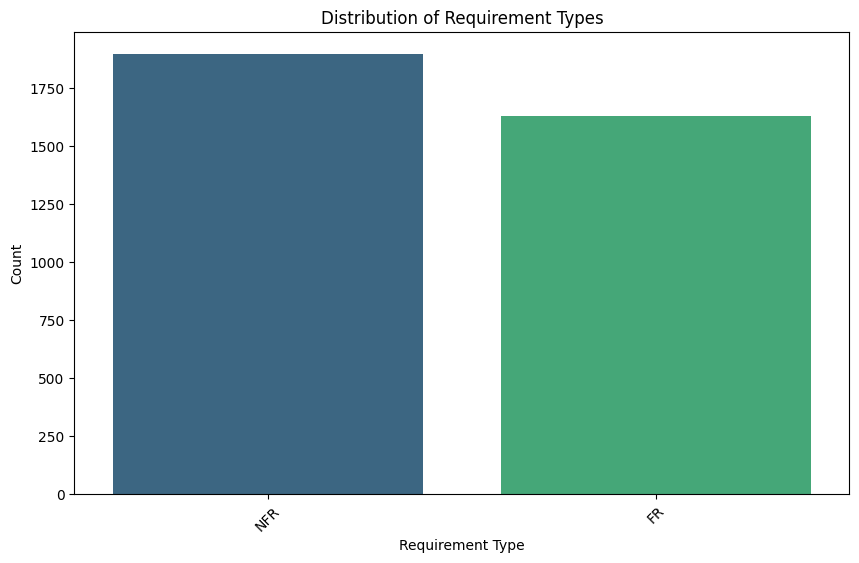

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-341ff7023847>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category, palette='Set2')


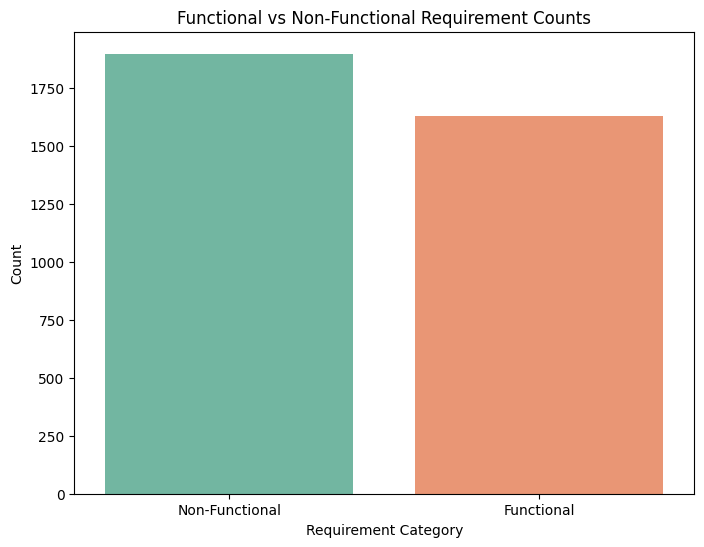

In [ ]:
# Create a copy of the dataset to work with
functional_labels = ['FR']
# Apply the transformation to the copied dataset without altering the original
category = dataset_copy['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=category, palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()


Summary statistics for requirement lengths:


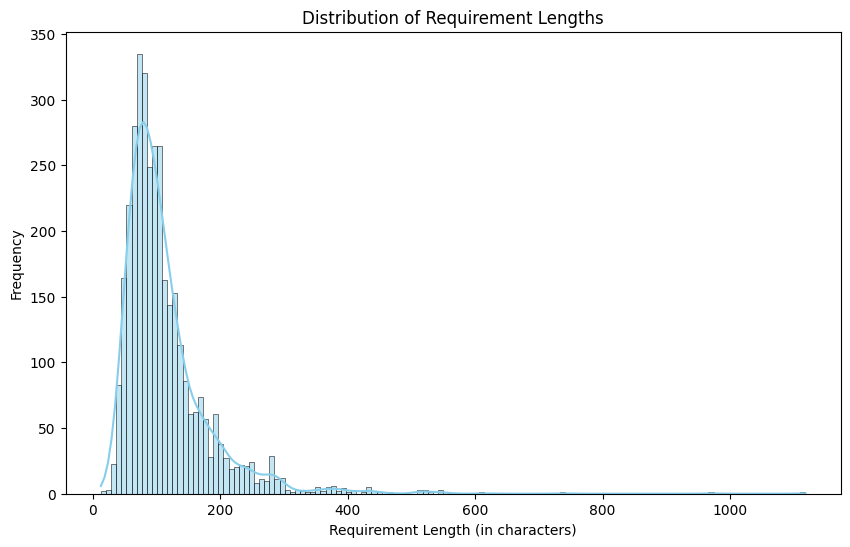

In [ ]:
dataset_copy['Requirement_Length'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
dataset_copy['Word_Count'] = dataset_copy['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset_copy['Character_Count'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset_copy['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset_copy['Character_Count'].describe())

Summary statistics for word counts:
count    3527.000000
mean       18.610434
std        11.545401
min         2.000000
25%        11.000000
50%        16.000000
75%        22.000000
max       179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count    3527.000000
mean      113.928551
std        69.930567
min        13.000000
25%        72.000000
50%        96.000000
75%       133.000000
max      1118.000000
Name: Character_Count, dtype: float64


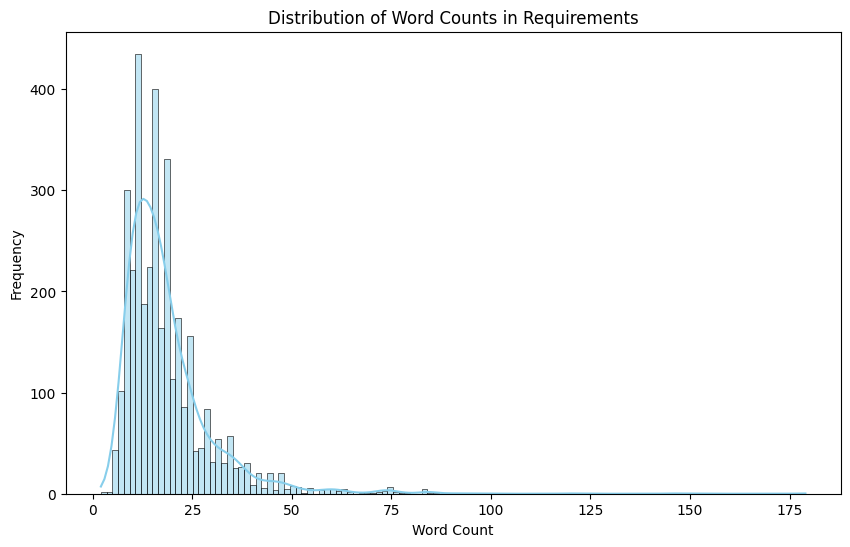

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:


# 1. Average Length of All Requirements
def average_length(dataset_copy):
    avg_length = dataset_copy['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset_copy):
    word_lengths = dataset_copy['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset_copy['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset_copy['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset_copy):
    requirement_counts = dataset_copy['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset_copy),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset_copy)
complexity = textual_complexity(dataset_copy)
uniqueness = unique_vs_repeated(dataset_copy)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


Average Length of All Requirements:
113.92855117663737

Textual Complexity:
{'avg_word_length': 4.888495263360528, 'avg_sentence_count': 1.2222852282392969, 'avg_sentence_length': 16.364334318927458}

Unique vs. Repeated Requirements:
{'total_requirements': 3527, 'unique_requirements': 1382, 'repeated_requirements': 595, 'repeated_requirements_list': Requirement
User data should be regularly backup and stored safely                                                                                                 8
The software should be updated regularly and compatible with technological progress                                                                    8
Only registered customers can purchase streaming movies.                                                                                               7
The system should be scaled and can be easily adapted to increasing user demands.                                                                      7
A strong authentication

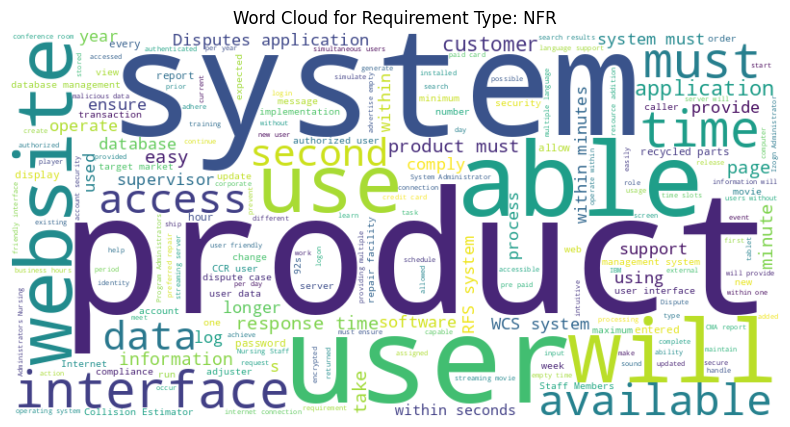

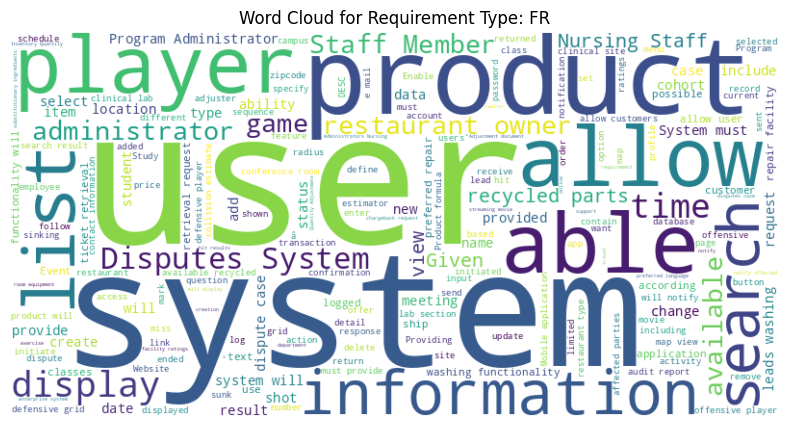

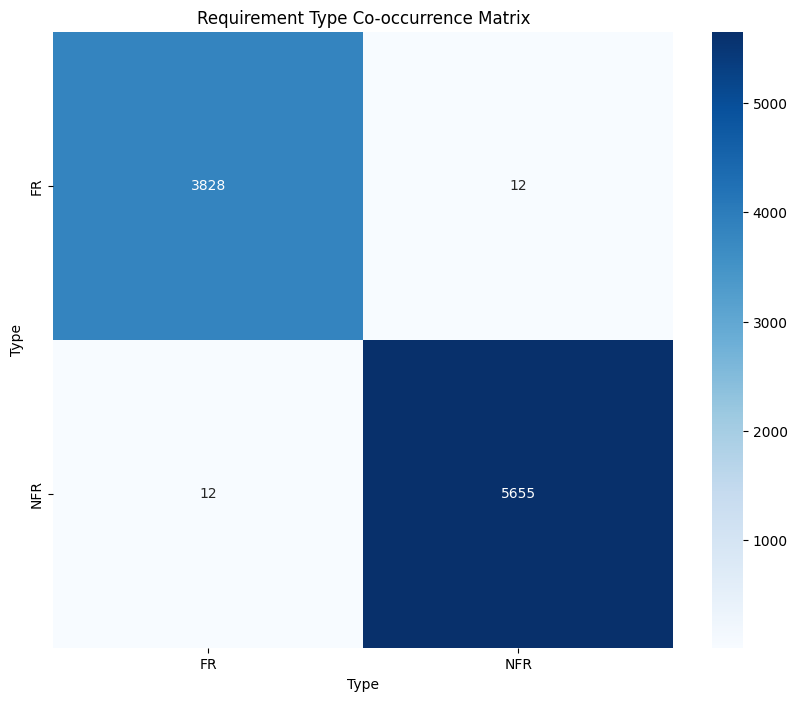

In [ ]:

def generate_word_clouds_by_type(dataset_copy):
    requirement_types = dataset_copy['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset_copy[dataset_copy['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset_copy):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset_copy = dataset_copy.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type']).T.dot(
        pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset_copy)
requirement_type_cooccurrence_matrix(dataset_copy)

## missing check

In [ ]:
print(dataset_copy.isnull().sum())


Requirement           0
Type                  0
Requirement_Length    0
Word_Count            0
Character_Count       0
dtype: int64


In [ ]:
# clean text
def clean_df(df):
  #lower casing requirements
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  #removing special characters
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  #removing digits
  df = df.replace(to_replace=r'\d', value='', regex=True)
  #removing punctuation
  string.punctuation
  xx= []
  for i in range(len(df['Requirement'])):
    temp =df['Requirement'][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return df

dataset_copy = clean_df(dataset_copy)
testdata = clean_df(testdata)

In [ ]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [ ]:
x = count_non_english_characters(dataset_copy , 'Requirement')
print('Number of non English characters in Train Dataset : ' , x)

['â', 'â'] the twitter âtweetâ interface should be according to the twitter guidelines
['â', 'â'] the facebook âlikeâ interface should be according to the facebook guidelines
['â'] hard drive space gist hard drive space scale the applicationâs need of hard drive space meter mb must no more than  mb plan no more than  mb wish no more than  mb mb defined megabyte
['â', 'œ', 'â', 'â'] design constraints we will use âœwaterfall methodâ and object â oriented programming paradigm we will use java as programming language the android version of the device should be  or higher the system requires internet connection all the time
['â'] â the system will be designed in such a way that the algorithms for the four main units will be able to be easily swapped out
['â'] the overall accuracy of the web apiâs response will be measured using a developermade testing set
['â'] the accuracy of the generic question constructionâ part will be close to  
['â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â',

In [ ]:
xx = count_non_english_characters(testdata , 'Requirement')
print('Number of non English characters in test Dataset : ' , xx)

Number of non English characters in test Dataset :  0


In [ ]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

dataset_copy['Requirement'] = remove_non_english_characters(dataset_copy,'Requirement')
testdata['Requirement'] = remove_non_english_characters(testdata,'Requirement')

## testing our work
print('Number of non english characters in Train dataset : ',count_non_english_characters(dataset_copy,'Requirement') ,'\nNumber of non english characters in Test Dataset : ',
count_non_english_characters(testdata,'Requirement'))

Number of non english characters in Train dataset :  0 
Number of non english characters in Test Dataset :  0


In [ ]:
#removing stopwords

nlp = spacy.load("en_core_web_sm")
# doc = nlp(dataset_copy['Requirement'])

def context_stw_rmv(df,col):
  temp=[]


  stopwords = set(spacy.lang.en.stop_words.STOP_WORDS) - {"must", "mustn't", "must not", "should", "shouldn't", "should not","shall", "shalln't", "shall not", "can", "can't", "cannot", "never", "not","every", "each", "all", "any", "be" }

  for i in range(len(df[col])):
        doc = nlp(df[col][i])  # Ensure it's a string
        filtered_words = [
            token.text for token in doc
            if token.text.lower() not in stopwords or token.pos_ in {"NOUN", "VERB", "AUX", "MODAL"}
        ]
        temp.append(" ".join(filtered_words))
  return temp






In [ ]:
dataset_copy['Requirement'] = context_stw_rmv(dataset_copy,'Requirement')

In [ ]:
testdata['Requirement'] = context_stw_rmv(testdata,'Requirement')

In [ ]:
label_encoder = LabelEncoder()
dataset_copy['Type'] = label_encoder.fit_transform(dataset_copy['Type'])
testdata['Type'] = label_encoder.fit_transform(testdata['Type'])

## ML

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# # Example input sentence
# sentence = "The system must authenticate users."

# # Convert to BERT token IDs
# tokens = tokenizer(sentence, return_tensors="pt")

# # Extract word embeddings from BERT
# with torch.no_grad():
#     embeddings = model(**tokens).last_hidden_state

# # Convert embeddings to a fixed-size vector (average word embeddings)
# sentence_vector = torch.mean(embeddings, dim=1).numpy()

# print(sentence_vector)  # Output: (1, 768) → 768-dimensional vector for ML models


def ml_token(df):
  x=[]
  for i in range(len(df['Requirement'])):
    tokens = tokenizer(df['Requirement'][i], return_tensors="pt")
    with torch.no_grad():
      embeddings = model(**tokens).last_hidden_state
    sentence_vector = torch.mean(embeddings, dim=1).numpy()
    x.append(sentence_vector)
  return x





/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
dataset_copy['ML_Requirement']= ml_token(dataset_copy)

In [ ]:
testdata['ML_Requirement']=ml_token(testdata)

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Load BERT model & tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# # Example dataset (Replace this with your actual dataset)
# sentences = [
#     "The system must authenticate users.",
#     "Users should reset their passwords periodically.",
#     "Ensure data security and prevent breaches."
# ]
# labels = [1, 0, 1]  # Example labels (Functional = 1, Non-functional = 0)

# Convert sentences to embeddings
def get_bert_embedding(df ):
  temp=[]
  for i in range(len(df['Requirement'])):
    sentence = df['Requirement'][i]
    tokens = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        embeddings = model(**tokens).last_hidden_state
    sentence_vector = torch.mean(embeddings, dim=1).numpy()  # Convert to 1x768
    temp.append(sentence_vector.flatten())  # Convert shape (1, 768) → (768,)
  return temp

dataset_copy # Output: (3, 768)


,Requirement,Type,Requirement_Length,Word_Count,Character_Count,ML_Requirement
0,system shall refresh display every seconds,1,54,9,54,"[[-0.19231857, 0.16526009, 0.5557513, -0.10015..."
1,application shall match color schema set forth...,1,96,16,96,"[[-0.1757786, 0.23714177, 0.2686289, 0.0096196..."
2,projected data must be readable x projecti...,1,159,30,159,"[[0.047867242, 0.13125122, 0.41738456, 0.08325..."
3,product shall be available normal business hou...,1,196,36,196,"[[-0.21643, -0.20585299, 0.5299882, -0.0050846..."
4,projected data must be understandable x proj...,1,203,35,203,"[[-0.007031705, 0.19224533, 0.45521125, 0.0180..."
...,...,...,...,...,...,...
3522,software should appeal wide audience providing...,1,81,12,81,"[[-0.05313748, 0.052260313, 0.37938374, -0.061..."
3523,strong authentication system should be provide...,1,77,11,77,"[[-0.18626595, 0.12719293, 0.108555906, 0.0532..."
3524,system should be scaled can be easily adapted ...,1,81,14,81,"[[-0.26664594, -0.036314514, 0.5024736, 0.2305..."
3525,user data should be regularly backup stored sa...,1,54,9,54,"[[-0.15347555, 0.17573887, 0.07234584, 0.15871..."


In [ ]:
dataset_copy['ML_Requirement'] = get_bert_embedding(dataset_copy)


In [ ]:
testdata['ML_Requirement'] = get_bert_embedding(testdata)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_copy['ML_Requirement'], dataset_copy['Type'], test_size=0.25, random_state=42)
X_train_fixed = np.vstack(X_train)
X_test_fixed = np.vstack(X_test)

In [ ]:
models = {
    "SVM (C=1.0)": SVC(kernel='linear', C=1, random_state=42),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (K=3)": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB()
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)



##### add cross validationnnnn



best_model = None
best_model_name = ""
best_accuracy = 0

# apply cross validation for models
for name, model in models.items():
    # scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    # print(f"{name} Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")
    model.fit(X_train_fixed, y_train)
    y_pred = model.predict(X_test_fixed)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {test_accuracy * 100:.2f}%")
    # Save the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
        best_model_name = name

SVM (C=1.0) Test Accuracy: 95.01%
Logistic Regression (L2) Test Accuracy: 94.44%
Decision Tree Test Accuracy: 90.25%
Random Forest Test Accuracy: 95.24%
K-Nearest Neighbors (K=3) Test Accuracy: 92.63%
Naive Bayes Test Accuracy: 79.82%


In [ ]:
TestData = np.vstack(testdata['ML_Requirement'])
prediction = best_model.predict(TestData)



accuracy = accuracy_score(testdata['Type'], prediction)

print("Accuracy:", accuracy)

Accuracy: 1.0


## DL

In [ ]:
import spacy
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load SpaCy
nlp = spacy.load("en_core_web_sm")

# def lemmatize_only(texts):
#     """
#     Lemmatizes a list of lowercase, cleaned texts.
#     """
#     lemmatized_texts = []
#     for sentence in texts:
#         doc = nlp(sentence)
#         lemmas = [token.lemma_ for token in doc if not token.is_space]
#         lemmatized_texts.append(" ".join(lemmas))
#     return lemmatized_texts

# def prepare_dl_input(df, text_column='Requirement', num_words=10000, oov_token='<OOV>', use_lemmatization=True):
#     """
#     Prepares input data for deep learning:
#     - Lemmatizes (if needed)
#     - Tokenizes
#     - Computes maxlen (95th percentile)
#     - Pads sequences

#     Returns: padded_X, tokenizer, maxlen
#     """
#     raw_texts = df[text_column].tolist()

#     # Step 1: Lemmatize if needed
#     if use_lemmatization:
#         processed_texts = lemmatize_only(raw_texts)
#     else:
#         processed_texts = raw_texts

#     # Step 2: Fit tokenizer ONCE
#     tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
#     tokenizer.fit_on_texts(processed_texts)

#     # Step 3: Convert to sequences
#     sequences = tokenizer.texts_to_sequences(processed_texts)

#     # Step 4: Calculate maxlen using 95th percentile
#     seq_lengths = [len(seq) for seq in sequences]
#     maxlen = int(np.percentile(seq_lengths, 95))
#     print(f"📏 Using maxlen = {maxlen} based on 95th percentile")

#     # Step 5: Pad sequences
#     padded_X = pad_sequences(sequences, padding='post', truncating='post', maxlen=maxlen)

#     return padded_X, tokenizer, maxlen




def lemma_token_dl(df):
  lemmatized_texts = []
  for i in range(len(df['Requirement'])):
    doc = nlp( df['Requirement'][i])
    lemmas = [token.lemma_ for token in doc if not token.is_space]
    lemmatized_texts.append(" ".join(lemmas))

  tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
  tokenizer.fit_on_texts(lemmatized_texts)
  sequences = tokenizer.texts_to_sequences(lemmatized_texts)
  seq_lengths = [len(seq) for seq in sequences]
  maxlen = int(np.percentile(seq_lengths, 95))
  padded_X = pad_sequences(sequences, padding='post', truncating='post', maxlen=maxlen)
  # padded_X = pd.DataFrame(padded_X)
  return padded_X , maxlen






In [ ]:
x, maxlen = lemma_token_dl(dataset_copy)
y ,_ = lemma_token_dl(testdata)

In [ ]:
dataset_copy['DL_Requirement'] = x.tolist()
dataset_copy

,Requirement,Type,Requirement_Length,Word_Count,Character_Count,ML_Requirement,DL_Requirement
0,system shall refresh display every seconds,1,54,9,54,"[-0.19231857, 0.16526009, 0.5557513, -0.100150...","[4, 3, 560, 29, 82, 32, 0, 0, 0, 0, 0, 0, 0, 0..."
1,application shall match color schema set forth...,1,96,16,96,"[-0.1757786, 0.23714177, 0.2686289, 0.00961965...","[22, 3, 540, 262, 1046, 127, 561, 388, 1047, 1..."
2,projected data must be readable x projecti...,1,159,30,159,"[0.047867242, 0.13125122, 0.41738456, 0.083256...","[347, 19, 10, 2, 1048, 299, 714, 218, 715, 10,..."
3,product shall be available normal business hou...,1,196,36,196,"[-0.21643, -0.20585299, 0.5299882, -0.00508461...","[6, 3, 2, 23, 880, 210, 87, 122, 5, 13, 27, 34..."
4,projected data must be understandable x proj...,1,203,35,203,"[-0.007031705, 0.19224533, 0.45521125, 0.01806...","[347, 19, 10, 2, 440, 299, 714, 218, 715, 10, ..."
...,...,...,...,...,...,...,...
3522,software should appeal wide audience providing...,1,81,12,81,"[-0.05313748, 0.052260313, 0.37938374, -0.0614...","[81, 8, 331, 552, 534, 15, 202, 56, 33, 0, 0, ..."
3523,strong authentication system should be provide...,1,77,11,77,"[-0.18626595, 0.12719293, 0.108555906, 0.05323...","[642, 342, 4, 8, 2, 15, 5, 61, 118, 0, 0, 0, 0..."
3524,system should be scaled can be easily adapted ...,1,81,14,81,"[-0.26664594, -0.036314514, 0.5024736, 0.23058...","[4, 8, 2, 294, 21, 2, 189, 616, 242, 5, 280, 0..."
3525,user data should be regularly backup stored sa...,1,54,9,54,"[-0.15347555, 0.17573887, 0.07234584, 0.158719...","[5, 19, 8, 2, 290, 474, 84, 510, 0, 0, 0, 0, 0..."


In [ ]:
y ,_ = lemma_token_dl(testdata)
testdata['DL_Requirement'] = y.tolist()
testdata

,Requirement,Type,ML_Requirement,DL_Requirement
0,system shall display events activities,0,"[0.1989678, 0.17210267, 0.34868425, -0.1248891...","[4, 2, 18, 51, 92, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,display shall have regions left display is...,0,"[-0.33727494, 0.08894471, 0.49356264, -0.13764...","[18, 2, 24, 93, 149, 18, 3, 150, 151, 18, 3, 5..."
2,data displayed nodes graph rows table are msel...,0,"[-0.19941488, 0.018589735, 0.60244966, -0.0247...","[52, 18, 152, 153, 154, 53, 3, 155, 44, 52, 0,..."
3,table side display shall be split regions se...,0,"[-0.19561456, -0.07205556, 0.1564417, 0.057858...","[53, 156, 18, 2, 3, 157, 93, 158, 159, 0, 0, 0..."
4,top table will hold events are occur sequent...,0,"[-0.3426442, -0.0727592, 0.41554424, 0.0071133...","[160, 53, 19, 54, 51, 3, 65, 161, 0, 0, 0, 0, ..."
...,...,...,...,...
65,disputes application shall manipulate view bus...,1,"[0.009885985, 0.27230984, 0.3987181, 0.1326053...","[8, 15, 2, 231, 232, 144, 52, 16, 19, 36, 24, ..."
66,all updates data files database must be initia...,1,"[-0.07187682, 0.014568719, 0.38006625, -0.1088...","[23, 76, 145, 146, 40, 29, 3, 90, 8, 4, 0, 0, ..."
67,disputes application must conform legal requir...,1,"[0.107979454, 0.36143956, 0.44742176, -0.13104...","[8, 15, 29, 75, 147, 69, 45, 32, 148, 73, 0, 0..."
68,all business rules specified disputes system s...,1,"[0.24618444, 0.26794553, 0.34961408, -0.076463...","[23, 144, 234, 45, 8, 4, 2, 3, 235, 32, 148, 7..."


In [ ]:
X_DL = np.array(dataset_copy['DL_Requirement'].tolist(), dtype=np.int32)


X_train_DL, X_test_DL, y_train_DL, y_test_DL = train_test_split(X_DL, dataset_copy['Type'], test_size=0.25, random_state=42)
# X_train_DL = np.array(X_train_DL)
# X_test_DL = np.array(X_test_DL)
test_DL = np.array(testdata['DL_Requirement'].tolist(), dtype=np.int32)

In [ ]:
# sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train_DL, y_train_DL, epochs=10, batch_size=2)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7301 - loss: 0.5119
Epoch 2/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.9191 - loss: 0.2696
Epoch 3/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9632 - loss: 0.1297
Epoch 4/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9723 - loss: 0.0912
Epoch 5/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9875 - loss: 0.0604
Epoch 6/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9770 - loss: 0.0637
Epoch 7/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9882 - loss: 0.0316
Epoch 8/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9915 - loss: 0.0265
Epoch 9/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9869 - loss: 0.0291
Epoch 10/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9917 - loss: 0.0161
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
pred_DL = model.predict(X_test_DL)
# Apply threshold
pred_classes = (pred_DL > 0.5).astype("int32")
accuracy = accuracy_score(y_test_DL, pred_classes)
print("Accuracy:", accuracy)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9467120181405896


In [ ]:

# Predict
pred = model.predict(test_DL)
test_pred = (pred > 0.5).astype("int32")
accuracy = accuracy_score(testdata['Type'], test_pred)
print("Accuracy:", accuracy)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Accuracy: 0.5


In [ ]:
model.save("seq.h5")


In [ ]:
## load model in other projects

# from tensorflow.keras.models import load_model
# model = load_model("requirement_classifier_model.h5")


In [ ]:
# lstm model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu' , kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train_DL, y_train_DL, epochs=10, batch_size=2)


# Predict
pred = model.predict(test_DL)
test_pred = (pred > 0.5).astype("int32")
accuracy = accuracy_score(testdata['Type'], test_pred)
print("Accuracy:", accuracy)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5793 - loss: 0.8202
Epoch 2/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.8746 - loss: 0.3932
Epoch 3/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.5897 - loss: 0.6542
Epoch 4/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8209 - loss: 0.4781
Epoch 5/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.9085 - loss: 0.3152
Epoch 6/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.8968 - loss: 0.3202
Epoch 7/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.9561 - loss: 0.1837
Epoch 8/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9774 - loss: 0.1066
Epoch 9/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9883 - loss: 0.0752
Epoch 10/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9915 - loss: 0.0612
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
Accuracy: 0.5285714285714286


In [ ]:
# bi-lstm model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128,dropout=0.2, recurrent_dropout=0.2, return_sequences=False)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train_DL, y_train_DL, epochs=10, batch_size=2)


# Predict
pred = model.predict(test_DL)
test_pred = (pred > 0.5).astype("int32")
accuracy = accuracy_score(testdata['Type'], test_pred)
print("Accuracy:", accuracy)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 193s 128ms/step - accuracy: 0.7231 - loss: 0.5154
Epoch 2/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 194s 122ms/step - accuracy: 0.9573 - loss: 0.1322
Epoch 3/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 203s 122ms/step - accuracy: 0.9793 - loss: 0.0695
Epoch 4/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 162s 123ms/step - accuracy: 0.9893 - loss: 0.0363
Epoch 5/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 160s 121ms/step - accuracy: 0.9867 - loss: 0.0348
Epoch 6/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 161s 121ms/step - accuracy: 0.9941 - loss: 0.0195
Epoch 7/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 159s 121ms/step - accuracy: 0.9922 - loss: 0.0172
Epoch 8/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 202s 120ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 9/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 202s 121ms/step - accuracy: 0.9974 - loss: 0.0089
Epoch 10/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 161s 121ms/step - accuracy: 0.9966 - loss: 0.0111
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step
Accuracy: 0.42857142857142855


In [ ]:
# gru model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    GRU(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train_DL, y_train_DL, epochs=10, batch_size=2)


# Predict
pred = model.predict(test_DL)
test_pred = (pred > 0.5).astype("int32")
accuracy = accuracy_score(testdata['Type'], test_pred)
print("Accuracy:", accuracy)



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.5021 - loss: 1.1315
Epoch 2/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.5758 - loss: 0.7176
Epoch 3/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.8076 - loss: 0.4562
Epoch 4/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.8777 - loss: 0.3497
Epoch 5/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.8801 - loss: 0.3436
Epoch 6/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9080 - loss: 0.2989
Epoch 7/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9189 - loss: 0.2650
Epoch 8/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9105 - loss: 0.2946
Epoch 9/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9277 - loss: 0.2534
Epoch 10/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9324 - loss: 0.2446


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step
Accuracy: 0.4142857142857143
